# Example: Masked and weighted average:

This example focuses on area weights (weighting by the area of the grid cell), but is generalizable.  

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
# or
# from imports import (plt, np, xr)
path = '/home/ab9880f9-2d7bc8-2d48c2-2d9223-2d693c1d3cf3c1/shared-cmip6-for-ns1000k/historical/NorESM2-LM/r1i1p1f1/tas_Amon_NorESM2-LM_historical_r1i1p1f1_gn_200001-200912.nc'
tas_ds = xr.open_dataset(path)

## Get the area weigts:
For the CMIP data, each model has a file for the area of each grid cell. The variable name of this is 'areacella'. We load the NorESM one. 

In [11]:
path_area_weight ='~/shared-cmip6-for-ns1000k/historical/NorESM2-LM/r1i1p1f1/areacella_fx_NorESM2-LM_historical_r1i1p1f1_gn.nc'
areacella= xr.open_dataset(path)

## A useful functions to do a weighted and masked average


In [7]:
def masked_average(xa, dim=None, weights=None, mask=None):
    """
    This function will average 
    :param xa: dataArray
    :param dim: dimension or list of dimensions. e.g. 'lat' or ['lat','lon','time']
    :param weights: weights (as xarray)
    :param mask: mask (as xarray), True where values to be masked.
    :return: masked average xarray
    """
    xa_ = xa.copy()
    if mask is not None:
        dum, mask_alld = xr.broadcast(xa, mask) # broadcast to all dims
        xa_ = xa_.where(np.logical_not(mask))
        if weights is not None:
            dum, weights_alld = xr.broadcast(xa, weights) # broadcast to all dims
            weights_alld = weights_alld.where(np.logical_not(mask_alld))
            return (xa_*weights_alld).sum(dim=dim)/weights_alld.where(xa_.notnull()).sum(dim=dim)
        else:
            return xa_.mean(dim)
    elif weights is not None:
        dum, weights_alld = xr.broadcast(xa, weights) # broadcast to all dims
        return (xa_*weights_alld).sum(dim)/weights_alld.where(xa_.notnull()).sum(dim=dim)
    else:
        return xa.mean(dim)


## Application 1: Weigted global average:
Grid cells have different area, so when we do the global average, they have to be weigted by the area of each grid cell. 
Here we do it for 2 m temperature:

In [14]:
areacella

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 96, lon: 144, time: 120)
Coordinates:
  * time       (time) object 2000-01-16 12:00:00 ... 2009-12-16 12:00:00
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes:
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 1600-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     430335.0
    contact:                   Please send any requests or bug reports to nor...
    creation_date:             2019-08-15T13:38:57Z
    data_specs_version:     

In [12]:
aw_xr = areacella['areacella']
glob_mean = masked_average(tas_ds['tas'], dim=['lat','lon'], weights=aw_xr)
glob_mean.plot()

KeyError: 'areacella'

## Application 1: Weigted arctic average:
Let's try to also take only the data above 60$^\circ$N

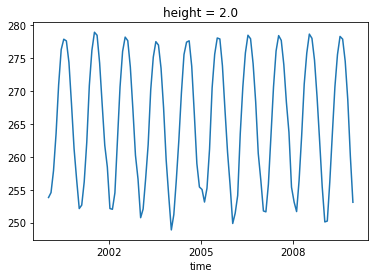

In [61]:
aw_xr = area_weight['areacella']
# mask values with lat < 60 deg north
mask = tas_ds['lat']<60.
glob_mean = masked_average(tas_ds['tas'], dim=['lat','lon'], weights=aw_xr, mask=mask)
glob_mean.plot()